In [134]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import matplotlib.dates as dates

import datetime
from datetime import date

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
df = pd.read_csv('/content/drive/My Drive/Data/Covid19/covid_19.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [92]:
df.shape

(21759, 38)

In [93]:
df.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [94]:
print('-->Location<---')
df.Location.unique()

-->Location<---


array(['DKI Jakarta', 'Indonesia', 'Riau', 'Jawa Barat', 'Banten',
       'Jawa Tengah', 'Sulawesi Tenggara', 'Bali', 'Kalimantan Timur',
       'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Timur',
       'Kepulauan Riau', 'Sulawesi Selatan', 'Jambi', 'Maluku', 'Papua',
       'Maluku Utara', 'Sumatera Selatan', 'Aceh', 'Kalimantan Tengah',
       'Lampung', 'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat',
       'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat',
       'Kalimantan Barat', 'Kalimantan Selatan',
       'Kepulauan Bangka Belitung', 'Bengkulu', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Gorontalo'], dtype=object)

In [95]:
date2=[]
for item in df['Date']:
    item2=item.split('/')
    month=int(item2[0])
    day=int(item2[1])
    year=int(item2[2])
    date2+=[datetime.date(year,month,day)]
df['Date']=date2
df['Date'] = pd.to_datetime(df['Date'])

In [96]:
data = df.drop(['City or Regency','Location ISO Code',
                'Province','Country','Continent','Island','Time Zone','Special Status',
                'Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths'], axis=1)

data.fillna(0)
data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
2,2020-03-02,Indonesia,2,0,0,2,2,0,0,2,Country,1916907,265185520,138.34,113.921327,-0.789275,0.00
3,2020-03-02,Riau,1,0,0,1,2,0,3,-1,Province,87024,6074100,69.80,101.805109,0.511648,0.00
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,664,10846145,16334.31,106.836118,-6.204699,0.18


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    21759 non-null  datetime64[ns]
 1   Location                21759 non-null  object        
 2   New Cases               21759 non-null  int64         
 3   New Deaths              21759 non-null  int64         
 4   New Recovered           21759 non-null  int64         
 5   New Active Cases        21759 non-null  int64         
 6   Total Cases             21759 non-null  int64         
 7   Total Deaths            21759 non-null  int64         
 8   Total Recovered         21759 non-null  int64         
 9   Total Active Cases      21759 non-null  int64         
 10  Location Level          21759 non-null  object        
 11  Area (km2)              21759 non-null  int64         
 12  Population              21759 non-null  int64 

In [98]:
data.shape

(21759, 17)

In [99]:
df = data[data['Location Level'] != 'Country']
df.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
0,2020-03-01,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
1,2020-03-02,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
3,2020-03-02,Riau,1,0,0,1,2,0,3,-1,Province,87024,6074100,69.80,101.805109,0.511648,0.00
4,2020-03-03,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
6,2020-03-03,Jawa Barat,1,1,0,0,1,1,8,-8,Province,35378,45161325,1276.55,107.603708,-6.920432,0.00


In [100]:
df_clean = df.drop_duplicates(subset='Location', keep='last')
df_clean.tail()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21753,2021-12-02,Sulawesi Tenggara,3,0,0,3,20160,527,19583,50,Province,38068,2635461,69.23,122.070311,-4.124689,20.00
21754,2021-12-02,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,13892,2641884,190.17,124.521240,1.259638,39.97
21755,2021-12-02,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,42013,5519245,131.37,100.465062,-0.850253,38.99
21756,2021-12-02,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,91592,8217551,89.72,104.169465,-3.216212,37.37
21757,2021-12-02,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,72981,14874889,203.82,99.051964,2.191894,19.42


In [101]:
df_clean[df_clean.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=True)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21364,2021-11-21,Gorontalo,1,0,0,1,11834,460,11374,0,Province,11257,1180651,104.88,122.376058,0.687003,38.96
21617,2021-11-28,Maluku Utara,2,0,3,-1,12101,303,11757,41,Province,31983,1307803,40.89,127.539107,0.212037,23.17
21722,2021-12-01,Sulawesi Barat,1,0,0,1,12353,346,12001,6,Province,16787,1559984,92.93,119.345019,-2.461746,22.18
21716,2021-12-01,Maluku,1,0,0,1,14587,261,14310,16,Province,46914,1847097,39.37,129.576792,-3.192572,14.13
21753,2021-12-02,Sulawesi Tenggara,3,0,0,3,20160,527,19583,50,Province,38068,2635461,69.23,122.070311,-4.124689,20.00
21700,2021-12-01,Bengkulu,1,0,0,1,23104,473,22612,19,Province,19919,1999539,100.38,102.338421,-3.533584,23.66
21749,2021-12-02,Papua Barat,9,0,0,9,23378,357,22771,250,Province,102955,1140701,11.08,132.976262,-2.045160,31.30
21746,2021-12-02,Nusa Tenggara Barat,1,0,0,1,27777,815,26872,90,Province,18572,5270247,283.77,117.508626,-8.606999,15.46
21736,2021-12-02,Jambi,1,0,0,1,29768,789,28968,11,Province,50058,3493357,69.79,102.723640,-1.697698,22.59
21748,2021-12-02,Papua,2,0,0,2,34341,559,32074,1708,Province,319036,4340348,13.60,138.696030,-4.666210,12.88


Provinsi Kasus Tertinggi

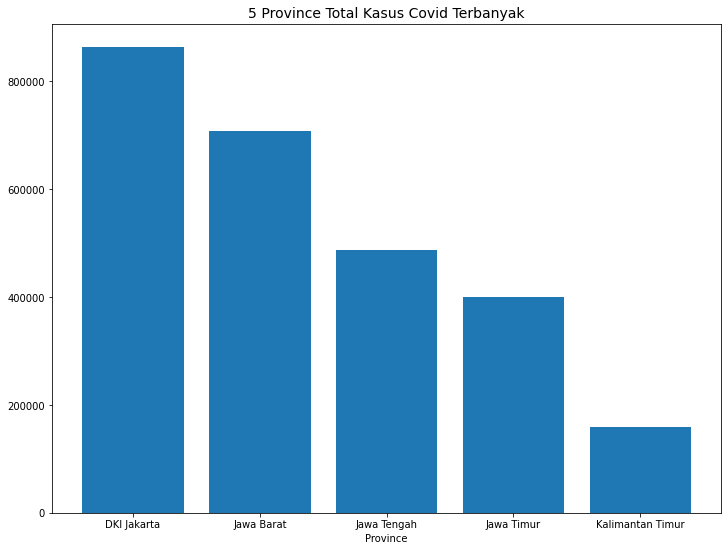

In [102]:
plt.figure(figsize=(12,9))
plt.bar(df_clean[df_clean.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Location'].values[:5], 
        df_clean[df_clean.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)['Total Cases'].values[:5])
plt.title('5 Province Total Kasus Covid Terbanyak', fontsize=14)
plt.xlabel('Province')
plt.show()

### Kasus Kematian Terbanyak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


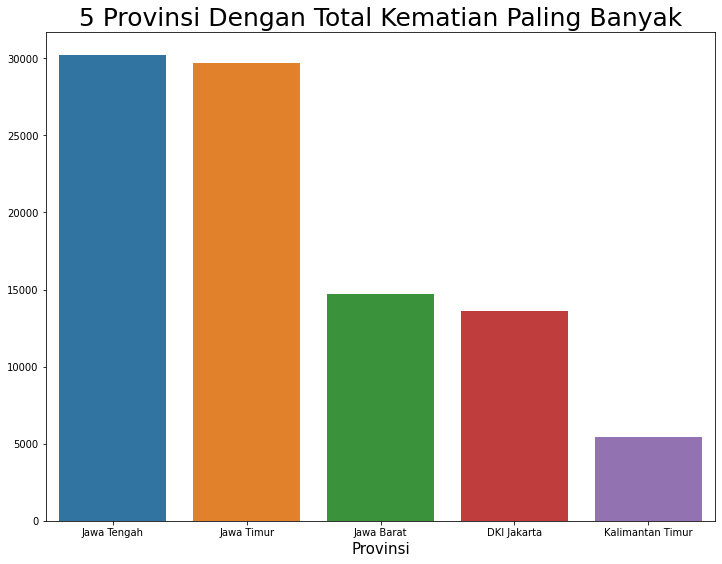

In [103]:
plt.figure(figsize=(12,9))
sns.barplot(df_clean[df_clean.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Location'].values[:5],  
            df_clean[df_clean.Location != 'Indonesia'].sort_values(by=['Total Deaths'], ascending=False)['Total Deaths'].values[:5])
plt.title('5 Provinsi Dengan Total Kematian Paling Banyak', fontsize=25)
plt.xlabel('Provinsi', fontsize=15)
plt.show()

### Kasus Kesembuhan Terbanyak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


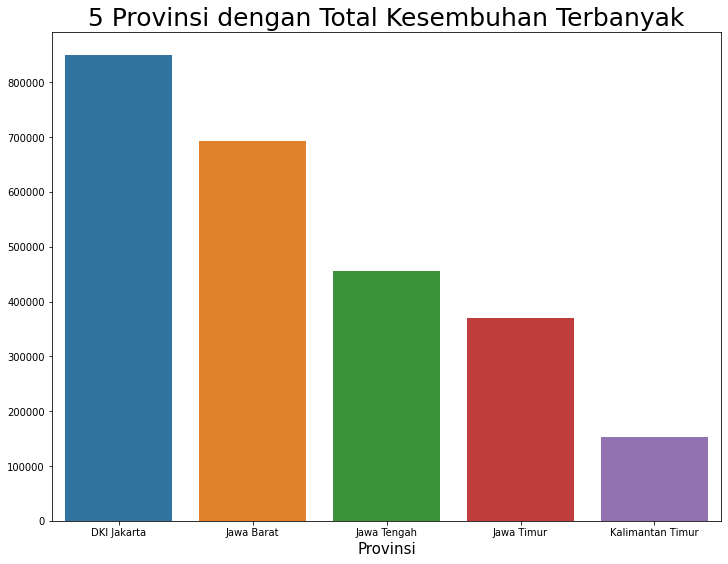

In [104]:
plt.figure(figsize=(12,9))
sns.barplot(df_clean[df_clean.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Location'].values[:5],  
            df_clean[df_clean.Location != 'Indonesia'].sort_values(by=['Total Recovered'], ascending=False)['Total Recovered'].values[:5])
plt.title('5 Provinsi dengan Total Kesembuhan Terbanyak', fontsize=25)
plt.xlabel('Provinsi', fontsize=15)
plt.show()

### Total Kasus Aktif Terbanyak

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


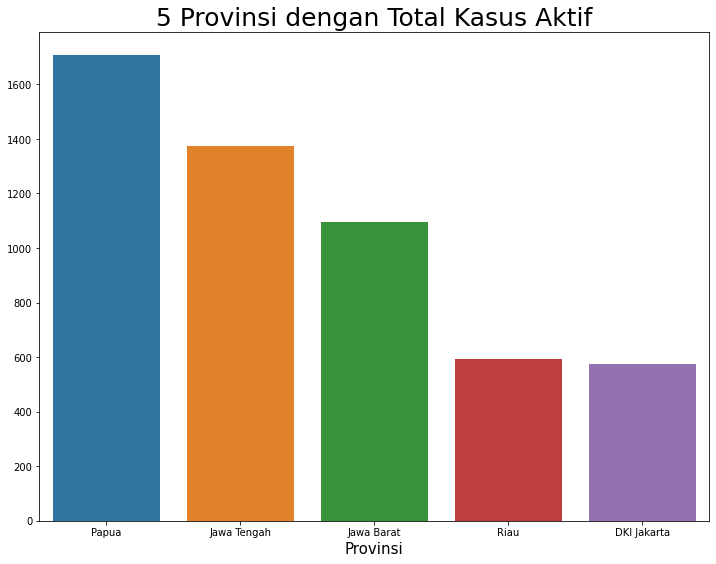

In [143]:
plt.figure(figsize=(12,9))
sns.barplot(df_clean[df_clean.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Location'].values[:5],  
            df_clean[df_clean.Location != 'Indonesia'].sort_values(by=['Total Active Cases'], ascending=False)['Total Active Cases'].values[:5])
plt.title('5 Provinsi dengan Total Kasus Aktif', fontsize=25)
plt.xlabel('Provinsi', fontsize=15)
plt.show()